In [1]:
# Standard libraries
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fnames, gui_fpath

import lib.sych.preprocess_raw as prep

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis


# Pooling Data From LVM

In [ ]:
# fpathData = gui_fpath("Root directory for raw data", "./")
# fpathData = '/mnt/neurophys-storage2/Sych/Yaro/data_raw/'
fpathData = '/run/user/1000/gvfs/smb-share:server=130.60.51.15,share=neurophysiology-storage2/Sych/Yaro/data_raw'

In [ ]:
dfFiles = prep.raw_get_files_df(fpathData)
dfFiles

In [ ]:
prep.raw_pool_data(dfFiles)

# Moving all datasets to data group

In [2]:
# fpathDataH5 = gui_fpath("Directory for data files", "./")
fpathDataH5 = '/media/alyosha/Data/TE_data/yarodata/sych_preprocessed/'
# fpathDataH5 = '/media/aleksejs/DataHDD/work/data/yaro/neuronal-raw-pooled'

In [3]:
dfRawH5 = prep.pooled_get_files_df(fpathDataH5)

In [4]:
dfRawH5

,path,mousename
0,/media/alyosha/Data/TE_data/yarodata/sych_prep...,mvg_4
1,/media/alyosha/Data/TE_data/yarodata/sych_prep...,mvg_7
2,/media/alyosha/Data/TE_data/yarodata/sych_prep...,mvg_8
3,/media/alyosha/Data/TE_data/yarodata/sych_prep...,mvg_9


In [ ]:
prep.pooled_move_data_subfolder(dfRawH5)

In [ ]:
prep.pooled_move_sanity_check(dfRawH5)

# Mark Starts and ends of Trials

In [ ]:
prep.pooled_mark_trial_starts_ends(dfRawH5)

# Appending Channel Labels

In [ ]:
# fpathDataOrig = gui_fpath("Directory for original data tree", "./")
fpathDataOrig = '/media/alyosha/Data/TE_data/yarodata/neuro/mvg48'
# fpathDataOrig = '/media/aleksejs/DataHDD/work/data/yaro/neuronal/mvg48'

In [ ]:
dfLabels = prep.channel_labels_get_files_df(fpathDataOrig)
dfLabels

In [ ]:
prep.pooled_mark_channel_labels(dfRawH5, dfLabels)

In [ ]:
prep.update_channel_labels_unique(dfRawH5)

# Adding behaviour

**Problems/Bugs**:
1. [early_go_trials, iGO_inhibition] overlap - within this framework could be solved by multiplexing enum
2. mvg_8_2018_11_22_a has 406 trials in behaviour but only 142 in neuro - crop to neuro

**TODO**:
1. Crop trial start/end to match behaviour
2. Drop some trials if Yaro says so

In [ ]:
dfNeuro = prep.orig_neuro_get_files_df(fpathDataOrig)
dfNeuro

In [ ]:
prep.pooled_mark_trial_types_performance(dfRawH5, dfNeuro)

# Drop bad sessions

1. Drop sessions that were not used by Yaro in first analysis

In [ ]:
prep.drop_sessions_not_in_neuro(dfNeuro, dfRawH5)

2. Deleting extra sessions that behave badly

In [ ]:
prep.drop_session(dfRawH5, 'mvg_8_2018_11_22_a')
prep.drop_session(dfRawH5, 'mvg_9_2019_03_21_a')

# Drop bad trials

1. Filtering short trials

In [ ]:
shortTrialDict = prep.find_short_trials(dfRawH5)

In [ ]:
shortTrialDict

In [ ]:
for session, idxsTrial in shortTrialDict.items():
    prep.drop_trials(dfRawH5, session, idxsTrial)

3. Filtering outlier trials - orders of magnitude larger than others

In [ ]:
largeTrialDict = prep.find_large_trials(dfRawH5)

In [ ]:
largeTrialDict

In [ ]:
for session, idxsTrial in largeTrialDict.items():
    prep.drop_trials(dfRawH5, session, idxsTrial)

# Fixing channels 1: Cropping broken trials

1. Find all trials not fully contained in the interval
2. Mark these trials as bad and update storage

In [10]:
badTrialIdxs = prep.get_trial_idxs_by_interval(dfRawH5, 'mvg_9_2019_02_26_a', 0, 161315, -2, 8)

Selected 343 of 874 trials


In [ ]:
prep.drop_trials(dfRawH5, 'mvg_9_2019_02_26_a', badTrialIdxs)

In [14]:
badTrialIdxs = prep.get_trial_idxs_by_interval(dfRawH5, 'mvg_4_2017_11_14_a', 14000, 400000, -2, 8)

Selected 40 of 810 trials


In [15]:
prep.drop_trials(dfRawH5, 'mvg_4_2017_11_14_a', badTrialIdxs)

dropping mvg_4_2017_11_14_a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [34]:
badTrialIdxs = prep.get_trial_idxs_by_interval(dfRawH5, 'mvg_4_2017_11_20_a', 5900, 400000, -2, 8)

Selected 7 of 682 trials


In [24]:
prep.drop_trials(dfRawH5, 'mvg_4_2017_11_20_a', badTrialIdxs)

dropping mvg_4_2017_11_20_a [0, 1, 2, 3, 4, 5, 6]


In [42]:
badTrialIdxs = prep.get_trial_idxs_by_interval(dfRawH5, 'mvg_7_2018_11_20_a', 190000, 400000, -2, 8, inside=True)

Selected 2 of 605 trials


In [43]:
prep.drop_trials(dfRawH5, 'mvg_7_2018_11_20_a', badTrialIdxs)

dropping mvg_7_2018_11_20_a [603, 604]


In [81]:
badTrialIdxs = prep.get_trial_idxs_by_interval(dfRawH5, 'mvg_7_2018_11_24_a', 0, 1800, -2, 8, inside=True)

Selected 4 of 724 trials


In [82]:
prep.drop_trials(dfRawH5, 'mvg_7_2018_11_24_a', badTrialIdxs)

dropping mvg_7_2018_11_24_a [0, 1, 2, 3]


In [40]:
badTrialIdxs = prep.get_trial_idxs_by_interval(dfRawH5, 'mvg_9_2019_02_19_a', 48500, 400000, -2, 8)

Selected 171 of 810 trials


In [41]:
prep.drop_trials(dfRawH5, 'mvg_9_2019_02_19_a', badTrialIdxs)

dropping mvg_9_2019_02_19_a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]


In [44]:
badTrialIdxs = prep.get_trial_idxs_by_interval(dfRawH5, 'mvg_9_2019_02_21_a', 0, 102000, -2, 8)

Selected 532 of 897 trials


In [45]:
prep.drop_trials(dfRawH5, 'mvg_9_2019_02_21_a', badTrialIdxs)

dropping mvg_9_2019_02_21_a [365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 5

In [57]:
badTrialIdxs = prep.get_trial_idxs_by_interval(dfRawH5, 'mvg_9_2019_02_26_a', 145000, 400000, -2, 8, inside=True)

Selected 391 of 874 trials


In [58]:
prep.drop_trials(dfRawH5, 'mvg_9_2019_02_26_a', badTrialIdxs)

dropping mvg_9_2019_02_26_a [483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 6

In [62]:
badTrialIdxs = prep.get_trial_idxs_by_interval(dfRawH5, 'mvg_9_2019_03_04_a', 0, 7000, -2, 8, inside=True)

Selected 24 of 690 trials


In [63]:
prep.drop_trials(dfRawH5, 'mvg_9_2019_03_04_a', badTrialIdxs)

dropping mvg_9_2019_03_04_a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [66]:
badTrialIdxs = prep.get_trial_idxs_by_interval(dfRawH5, 'mvg_9_2019_03_05_a', 0, 2500, -2, 8, inside=True)

Selected 7 of 380 trials


In [67]:
prep.drop_trials(dfRawH5, 'mvg_9_2019_03_05_a', badTrialIdxs)

dropping mvg_9_2019_03_05_a [0, 1, 2, 3, 4, 5, 6]


In [70]:
badTrialIdxs = prep.get_trial_idxs_by_interval(dfRawH5, 'mvg_9_2019_03_07_a', 0, 2500, -2, 8, inside=True)

Selected 7 of 589 trials


In [71]:
prep.drop_trials(dfRawH5, 'mvg_9_2019_03_07_a', badTrialIdxs)

dropping mvg_9_2019_03_07_a [0, 1, 2, 3, 4, 5, 6]


In [75]:
badTrialIdxs = prep.get_trial_idxs_by_interval(dfRawH5, 'mvg_9_2019_03_08_a', 0, 15000, -2, 8, inside=True)

Selected 50 of 740 trials


In [76]:
prep.drop_trials(dfRawH5, 'mvg_9_2019_03_08_a', badTrialIdxs)

dropping mvg_9_2019_03_08_a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [79]:
badTrialIdxs = prep.get_trial_idxs_by_interval(dfRawH5, 'mvg_9_2019_03_09_a', 0, 7000, -2, 8, inside=True)

Selected 23 of 586 trials


In [80]:
prep.drop_trials(dfRawH5, 'mvg_9_2019_03_09_a', badTrialIdxs)

dropping mvg_9_2019_03_09_a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


# Cropping starts and ends of trials to match behaviour

In [ ]:
prep.pooled_trunc_trial_starts_ntrials(dfRawH5)

# Testing trial length sensibility

In [ ]:
prep.pooled_trial_length_summary_excel(dfRawH5)

# Pulling Trial Durations From Behaviour Files


In [ ]:
dfBehavTiming = prep.behav_timing_get_files_df(fpathData)
dfBehavTiming

In [ ]:
prep.behav_timing_read_get_trial_lengths(dfRawH5, dfBehavTiming)

In [ ]:
prep.behav_timing_compare_neuro(dfRawH5)

# Plotting raw selected data for sensibility checks

In [5]:
prep.get_sessions(dfRawH5, 'mvg_7')

['mvg_7_2018_11_09_a',
 'mvg_7_2018_11_12_a',
 'mvg_7_2018_11_13_a',
 'mvg_7_2018_11_14_a',
 'mvg_7_2018_11_15_a',
 'mvg_7_2018_11_17_a',
 'mvg_7_2018_11_18_a',
 'mvg_7_2018_11_19_a',
 'mvg_7_2018_11_20_a',
 'mvg_7_2018_11_21_a',
 'mvg_7_2018_11_22_a',
 'mvg_7_2018_11_23_a',
 'mvg_7_2018_11_24_a',
 'mvg_7_2018_11_26_a',
 'mvg_7_2018_11_28_a',
 'mvg_7_2018_11_29_a',
 'mvg_7_2018_12_04_a',
 'mvg_7_2018_12_05_a']

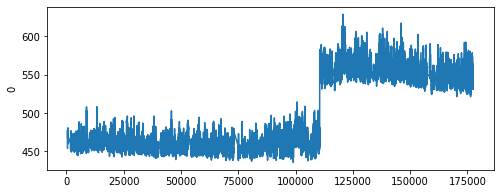

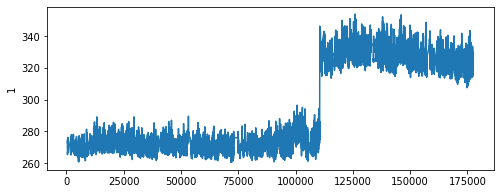

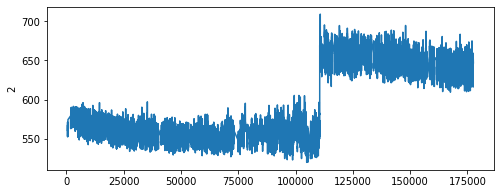

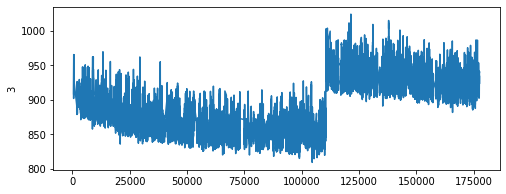

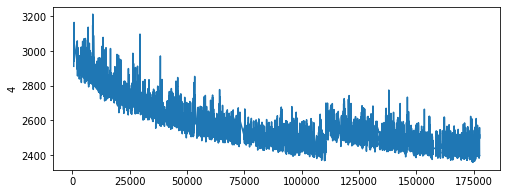

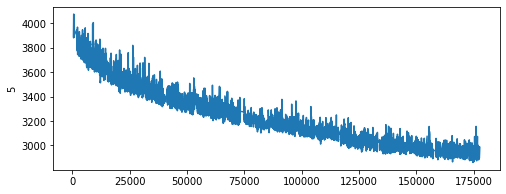

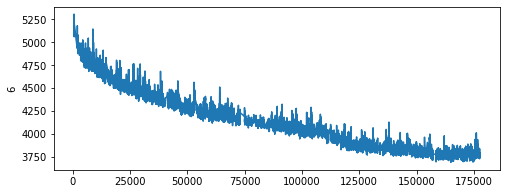

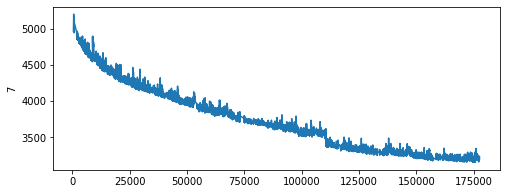

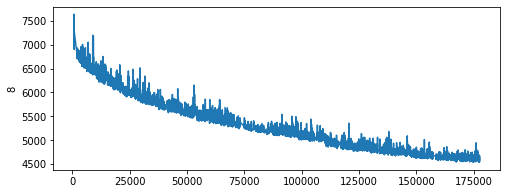

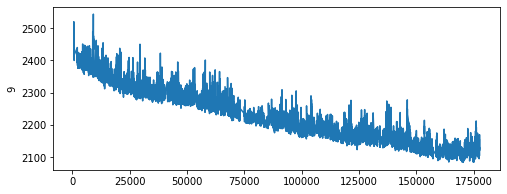

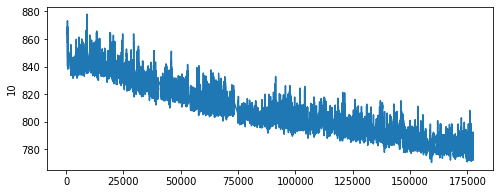

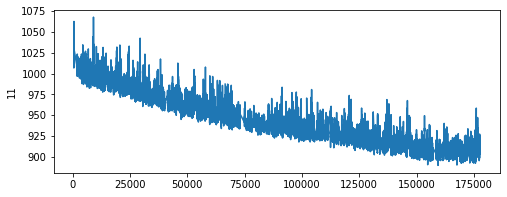

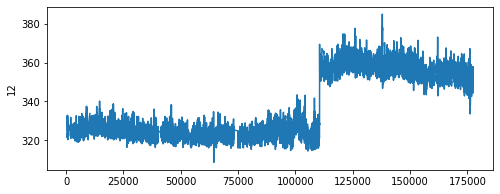

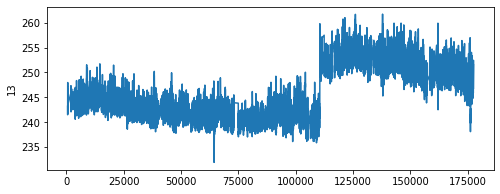

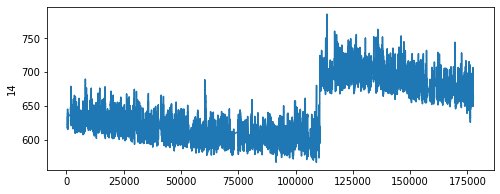

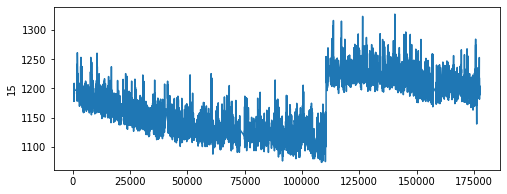

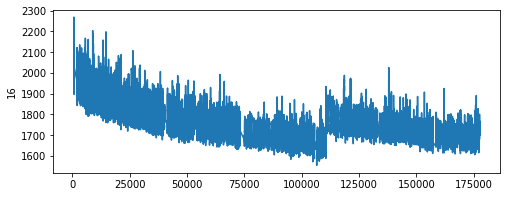

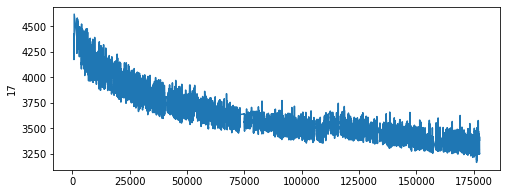

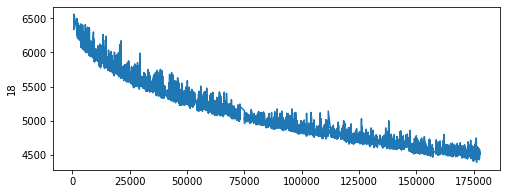

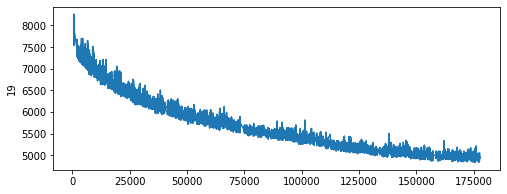

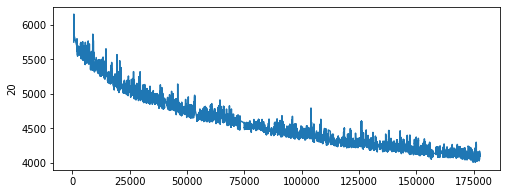

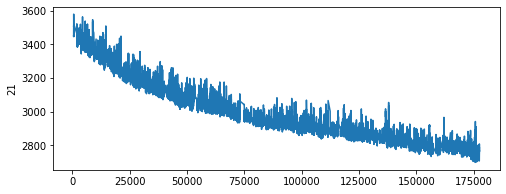

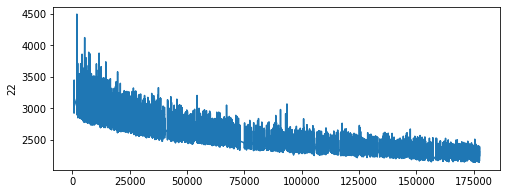

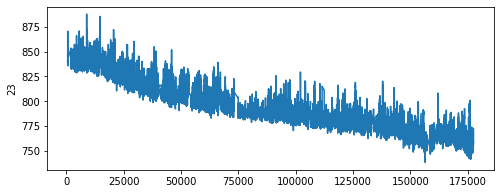

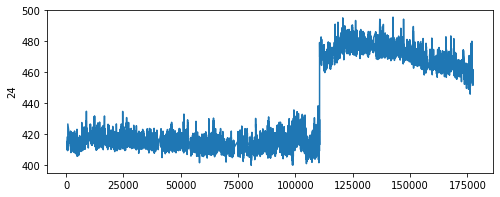

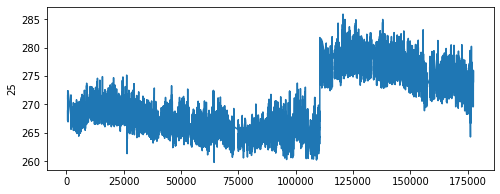

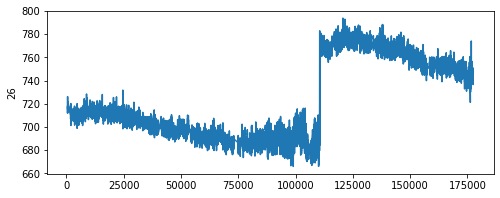

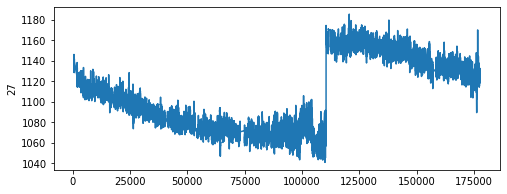

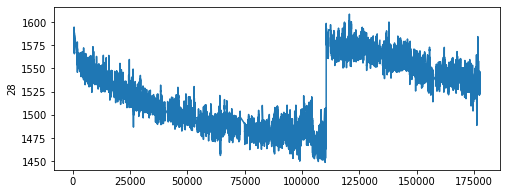

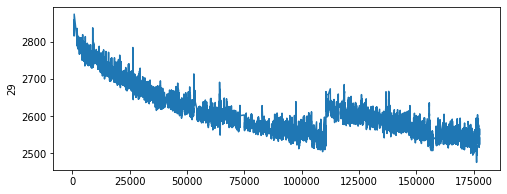

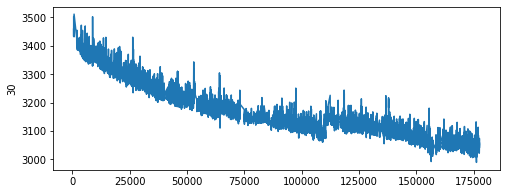

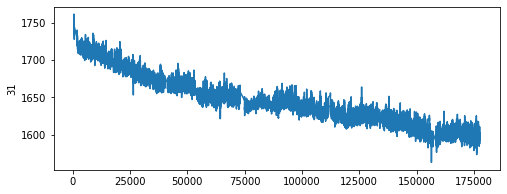

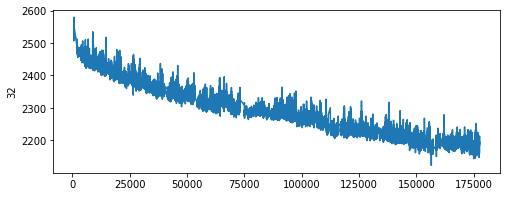

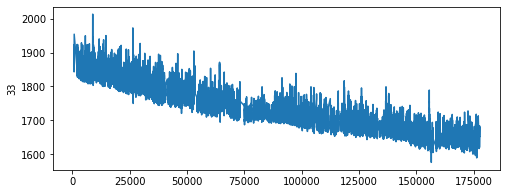

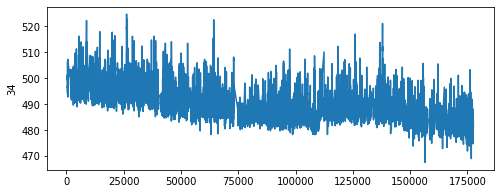

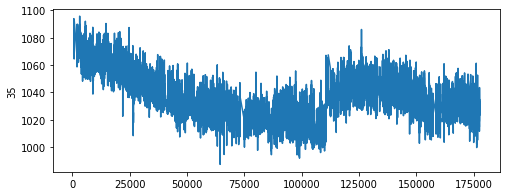

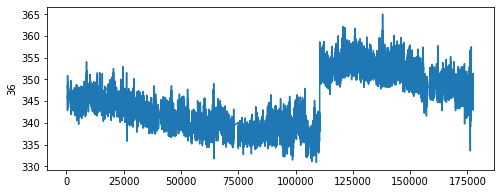

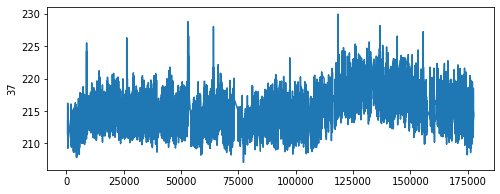

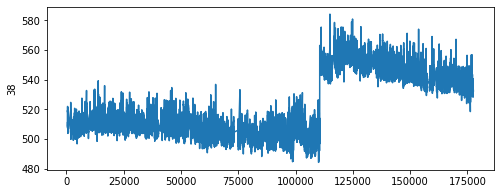

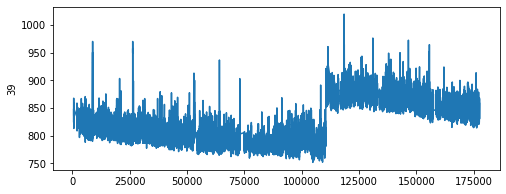

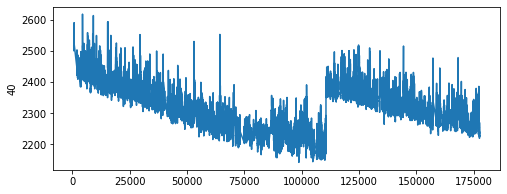

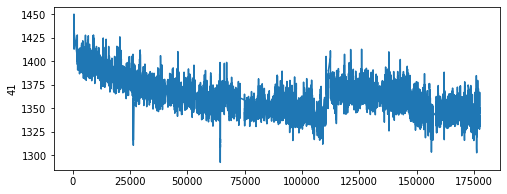

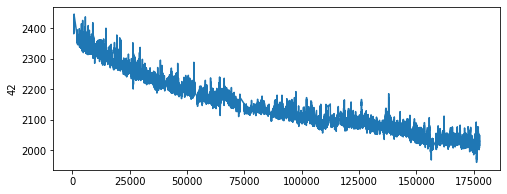

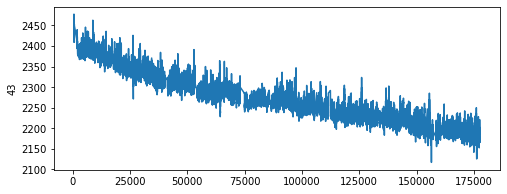

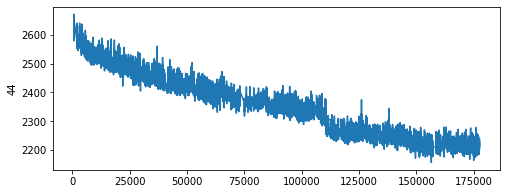

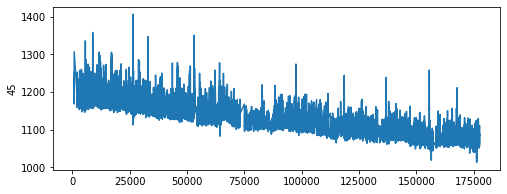

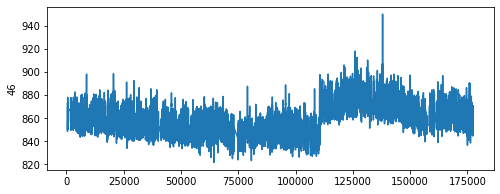

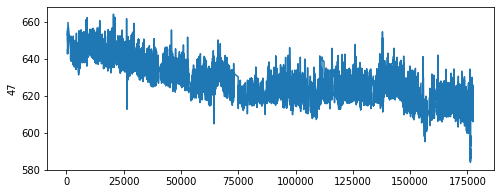

In [127]:
%matplotlib inline
for iCh in range(48):
    prep.plot_raw(dfRawH5, 'mvg_9_2019_02_08_a', iCh, onlyTrials=True, onlySelected=True, figsize=(8,3))

<IPython.core.display.Javascript object>


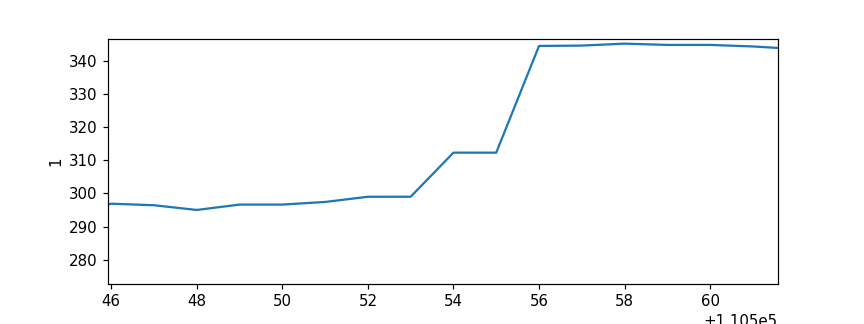

In [131]:
%matplotlib notebook
prep.plot_raw(dfRawH5, 'mvg_9_2019_02_08_a', 1, onlyTrials=False, onlySelected=True, figsize=(8,3))

# Background Subtraction

Test if there is significant gain from using higher order polynomials

In [ ]:
prep.pooled_plot_background_polyfit_residuals(dfRawH5, ordMax=8)

98200


<IPython.core.display.Javascript object>


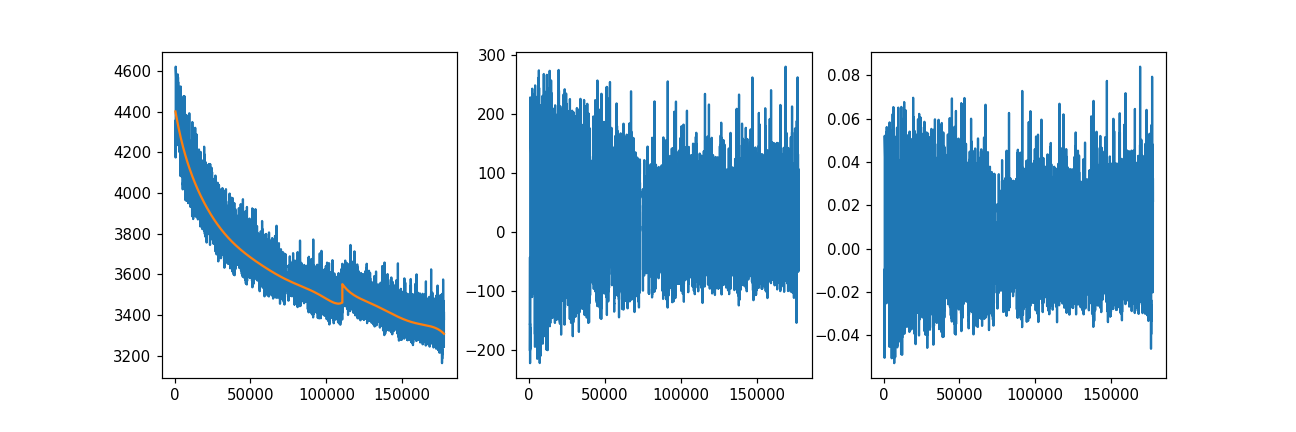

In [139]:
%matplotlib notebook
# %matplotlib inline
prep.poly_view_fit(dfRawH5, 'mvg_9_2019_02_08_a', 17, 15, onlyTrials=True, onlySelected=True, xPart=[110556, 8, 5])

# Fixing channels 2: Linear adjustment

In [ ]:
# Linear adjustment
intervLst = [0, 7427, 28259, 29648]
valLst = [1070, 2460, 430]
prep.fix_adjust_drop_channel(dfRawH5, 'mvg_8_2018_11_23_a', 20, intervLst, valLst, update=False)

In [ ]:
# Minor fix, lost FPS
pwdTmp = list(dfRawH5[dfRawH5['mousename'] == 'mvg_8']['path'])[0]

with h5py.File(pwdTmp, 'a') as f:
    f['data']['mvg_8_2018_11_23_a'].attrs['FPS'] = 20

# Test if pre-trial activity is actually small

In [ ]:
prep.check_pre_trial_activity_small(dfRawH5)

# Baseline Normalization

* ZScore (Trial/Session-wise)
* Pre-trial mean estimate (Trial/Session-wise)

In [140]:
xPartMap = {
    'mvg_7_2018_11_18_a' : [50285, 3, 5],
    'mvg_7_2018_11_20_a' : [18839, 3, 10],
    'mvg_7_2018_11_21_a' : [29034, 3, 10],
    'mvg_7_2018_11_22_a' : [152251, 8, 5],
    'mvg_7_2018_11_23_a' : [99177, 5, 7],
    'mvg_7_2018_11_26_a' : [6544, 1, 8],
    'mvg_7_2018_11_29_a' : [30529, 1, 8],
    'mvg_7_2018_12_05_a' : [95557, 10, 1],
    'mvg_8_2018_11_19_a' : [16712, 3, 8],
    'mvg_9_2019_02_07_a' : [59219, 3, 8],
    'mvg_9_2019_02_08_a' : [110556, 8, 5]
}

In [141]:
prep.extract_store_trial_data(dfRawH5, xPartMap,
                              targetFPS=20, bgOrd=15, fitOnlySelectedTrials=True, keepExisting=False)

mvg_4_2017_11_10_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
-- bn_session
-- bn_trial
mvg_4_2017_11_13_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_4_2017_11_14_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_4_2017_11_15_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
-- bn_session
-- bn_trial
mvg_4_2017_11_16_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_4_2017_11_17_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
-- bn_session
-- bn_trial
mvg_4_2017_11_20_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
--downsampling 40 (501, 400, 48)
-- bn_session
--downsampling 40 (501, 400, 48)
-- bn_trial
--downsampling 40 (501, 400, 48)
mvg_4_2017_11_21_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
--downsampling 40 (488, 400, 48)
-- bn_session
--downsampling 40 (488, 400, 48)
-- bn_trial
--downsampling 40 (488, 400, 48)
mvg_4_2017_11_22_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
--downsampling 40 (711, 400, 48)
-- bn_session
--downsampling 40 (711, 400, 48)
-- bn_trial
--downsampling 40 (711, 400, 48)
mvg_4_2017_11_23_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
--downsampling 40 (580, 400, 48)
-- bn_session
--downsampling 40 (580, 400, 48)
-- bn_trial
--downsampling 40 (580, 400, 48)
mvg_4_2017_11_24_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
--downsampling 40 (506, 400, 48)
-- bn_session
--downsampling 40 (506, 400, 48)
-- bn_trial
--downsampling 40 (506, 400, 48)
mvg_7_2018_11_09_a
-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_12_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_13_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_14_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_15_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_17_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_18_a
-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_19_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_20_a
-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_21_a
-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_22_a
-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_23_a
-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_24_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_26_a
-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_28_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_7_2018_11_29_a
-- raw
-- bn_session
-- bn_trial
mvg_7_2018_12_04_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_7_2018_12_05_a
-- raw
-- bn_session
-- bn_trial
mvg_8_2018_11_12_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_8_2018_11_13_a
-- raw
-- bn_session
-- bn_trial
mvg_8_2018_11_14_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_8_2018_11_15_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_8_2018_11_16_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_8_2018_11_17_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_8_2018_11_18_a
-- raw
-- bn_session
-- bn_trial
mvg_8_2018_11_19_a
-- raw
-- bn_session
-- bn_trial
mvg_8_2018_11_20_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_8_2018_11_21_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_8_2018_11_22_a
-- raw
--Warning: trial 141 too short have = 91 need 200 ; padding
-- bn_session
--Warning: trial 141 too short have = 91 need 200 ; padding
-- bn_trial
--Warning: trial 141 too short have = 91 need 200 ; padding
mvg_8_2018_11_23_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_8_2018_11_27_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_8_2018_11_28_a
-- raw
-- bn_session
-- bn_trial
mvg_8_2018_11_29_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_8_2018_12_04_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_06_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_07_a
-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_08_a
-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_12_a
-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_13_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_14_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_18_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_19_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_20_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_21_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_23_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_24_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_25_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_26_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
-- bn_session
-- bn_trial
mvg_9_2019_02_27_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
-- bn_session
-- bn_trial
mvg_9_2019_03_04_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_9_2019_03_05_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
-- bn_session
-- bn_trial
mvg_9_2019_03_06_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial
mvg_9_2019_03_07_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
-- bn_session
-- bn_trial
mvg_9_2019_03_08_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)


-- raw
-- bn_session
-- bn_trial
mvg_9_2019_03_09_a


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankWarning: Polyfit may be poorly conditioned
  return polyfit.poly_fit_transform(x, data, ord)
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/sych/preprocess_raw.py:669: RankW

-- raw
-- bn_session
-- bn_trial


# Extract and Store Performance